In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro, pearsonr
from statsmodels.stats.proportion import proportions_ztest

In [2]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
data['Personal Loan'].unique()

array([0, 1], dtype=int64)

In [5]:
accepted = data[data['Personal Loan']==1]

In [6]:
rejected = data[data['Personal Loan']==0]

In [9]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
accepted.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.0,480.000000,480.000000,480.00000,480.000000
mean,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,1.0,0.125000,0.291667,0.60625,0.297917
std,1394.393674,11.590964,11.582443,31.584429,1759.223753,1.115393,2.097681,0.753373,160.847862,0.0,0.331064,0.455004,0.48909,0.457820
min,10.000000,26.000000,0.000000,60.000000,90016.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
25%,1166.500000,35.000000,9.000000,122.000000,91908.750000,2.000000,2.600000,2.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
50%,2342.000000,45.000000,20.000000,142.500000,93407.000000,3.000000,3.800000,2.000000,0.000000,1.0,0.000000,0.000000,1.00000,0.000000
75%,3566.000000,55.000000,30.000000,172.000000,94705.500000,4.000000,5.347500,3.000000,192.500000,1.0,0.000000,1.000000,1.00000,1.000000
max,4981.000000,65.000000,41.000000,203.000000,96008.000000,4.000000,10.000000,3.000000,617.000000,1.0,1.000000,1.000000,1.00000,1.000000


In [8]:
rejected.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.0,4520.000000,4520.000000,4520.000000,4520.000000
mean,2512.165487,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.0,0.102212,0.035841,0.595796,0.293584
std,1448.299331,11.450427,11.456672,40.578534,2156.949654,1.148771,1.567647,0.839975,92.038931,0.0,0.302961,0.185913,0.490792,0.455454
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1259.750000,35.000000,10.000000,35.000000,91911.000000,1.000000,0.600000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,2518.500000,45.000000,20.000000,59.000000,93437.000000,2.000000,1.400000,2.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,3768.250000,55.000000,30.000000,84.000000,94608.000000,3.000000,2.300000,3.000000,98.000000,0.0,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,8.800000,3.000000,635.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [10]:
#Looking at the means for different paramters we can observe that those who accepted the Loan had a higher income, mortgage and education
#We will need to validate this further, using hypothesis testing, but firstly we shall check for outliers and missing values

In [15]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [11]:
accepted.count()

ID                    480
Age                   480
Experience            480
Income                480
ZIP Code              480
Family                480
CCAvg                 480
Education             480
Mortgage              480
Personal Loan         480
Securities Account    480
CD Account            480
Online                480
CreditCard            480
dtype: int64

In [12]:
rejected.count()

ID                    4520
Age                   4520
Experience            4520
Income                4520
ZIP Code              4520
Family                4520
CCAvg                 4520
Education             4520
Mortgage              4520
Personal Loan         4520
Securities Account    4520
CD Account            4520
Online                4520
CreditCard            4520
dtype: int64

In [13]:
#There are no missing values

Text(0, 0.5, 'COUNT')

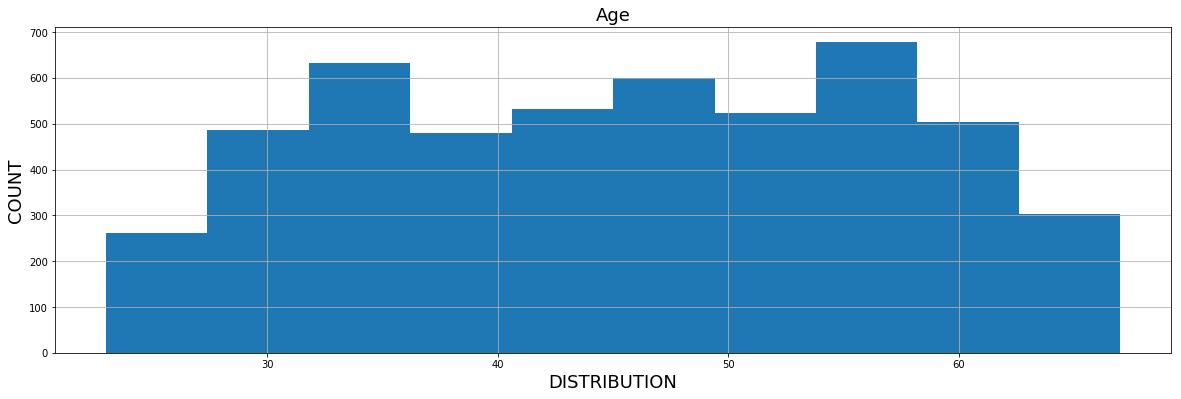

In [17]:
#Distribution of BMI,Experience, Income, Family, CCAvg, Edication, Mortgage, Securitites, CD Account, Online, Credit card
#AGE
rcParams['figure.figsize'] = 20, 6
data['Age'].hist()
plt.title('Age',fontsize=18)
plt.xlabel('DISTRIBUTION',fontsize=18)
plt.ylabel('COUNT',fontsize=18)

Text(0, 0.5, 'COUNT')

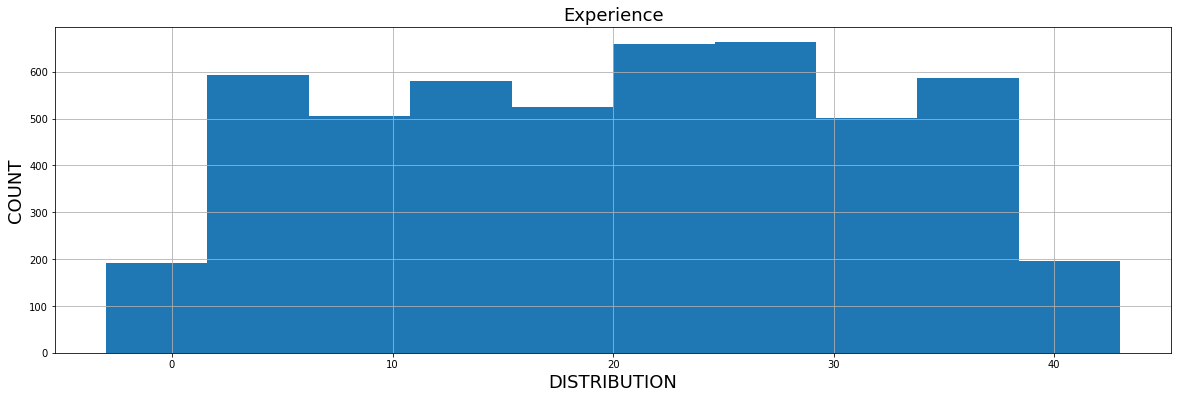

In [18]:
#Experience
#Experience has negative values we will need to explore it further
rcParams['figure.figsize'] = 20, 6
data['Experience'].hist()
plt.title('Experience',fontsize=18)
plt.xlabel('DISTRIBUTION',fontsize=18)
plt.ylabel('COUNT',fontsize=18)

Text(0, 0.5, 'COUNT')

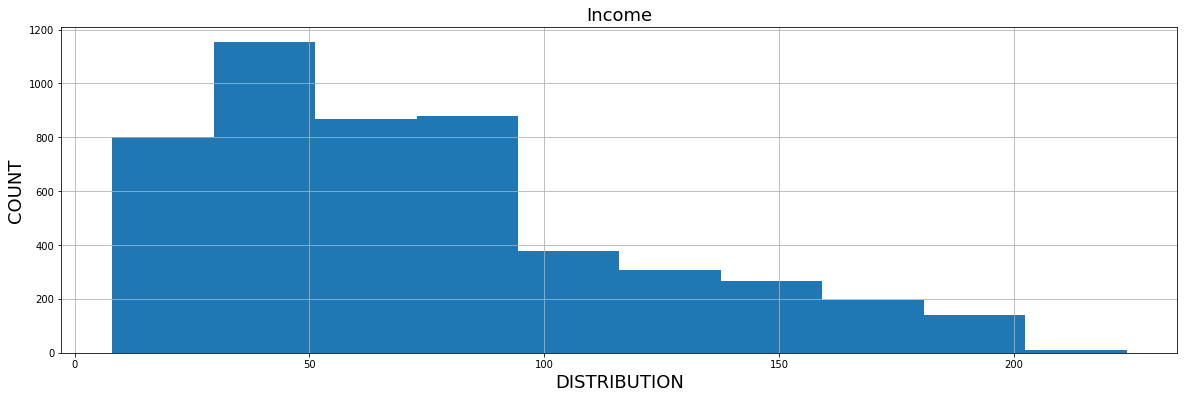

In [19]:
#Income
#Income is Right Skewed
rcParams['figure.figsize'] = 20, 6
data['Income'].hist()
plt.title('Income',fontsize=18)
plt.xlabel('DISTRIBUTION',fontsize=18)
plt.ylabel('COUNT',fontsize=18)

In [31]:
data['Income'].skew()

0.8413386072610816

Text(0, 0.5, 'COUNT')

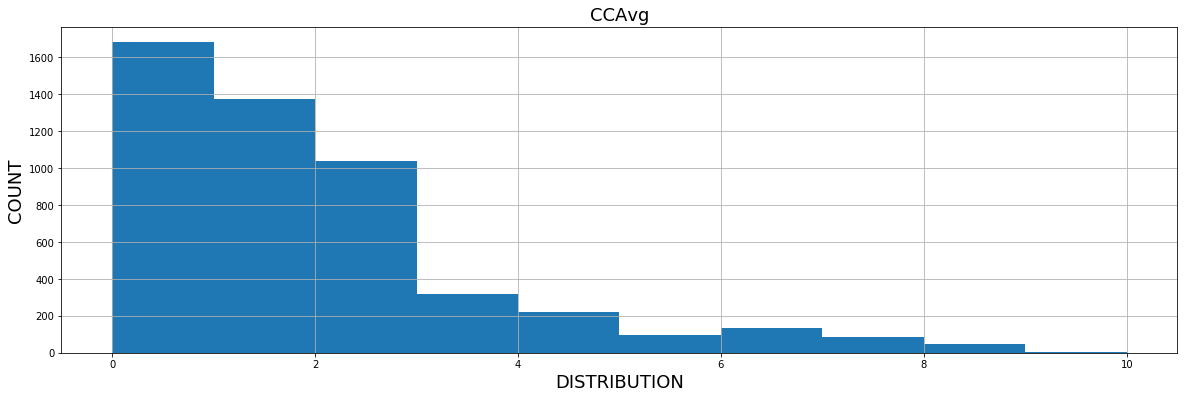

In [20]:
#Credit Card Spending Avg in $000
#CC Avg is Right Skewed
rcParams['figure.figsize'] = 20, 6
data['CCAvg'].hist()
plt.title('CCAvg',fontsize=18)
plt.xlabel('DISTRIBUTION',fontsize=18)
plt.ylabel('COUNT',fontsize=18)

In [32]:
data['CCAvg'].skew()

1.5984433366678663

Text(0, 0.5, 'COUNT')

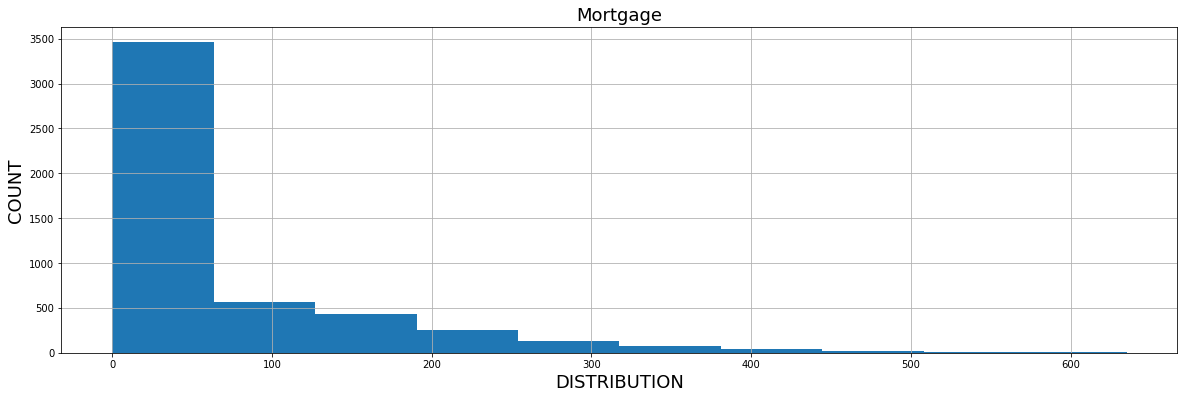

In [22]:
#Mortgage
#Mortgage is right Skewed
rcParams['figure.figsize'] = 20, 6
data['Mortgage'].hist()
plt.title('Mortgage',fontsize=18)
plt.xlabel('DISTRIBUTION',fontsize=18)
plt.ylabel('COUNT',fontsize=18)

In [33]:
data['Mortgage'].skew()

2.1040023191079444

Text(0, 0.5, 'Count')

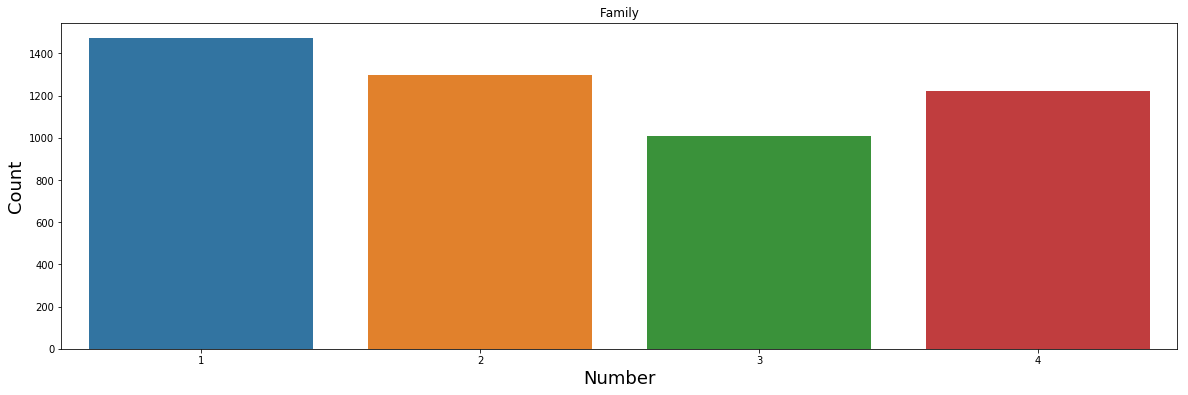

In [23]:
count_family = data.Family.value_counts()
sns.barplot(x=count_family.index,y=count_family)
plt.title('Family')
plt.xlabel('Number',fontsize=18)
plt.ylabel('Count',fontsize=18)

Text(0, 0.5, 'Count')

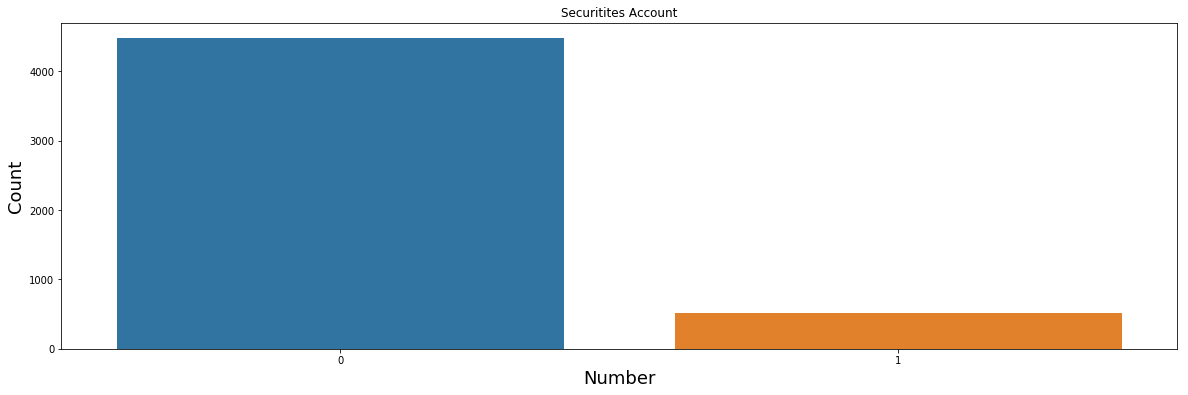

In [24]:
count_sec = data['Securities Account'].value_counts()
sns.barplot(x=count_sec.index,y=count_sec)
plt.title('Securitites Account')
plt.xlabel('Number',fontsize=18)
plt.ylabel('Count',fontsize=18)

Text(0, 0.5, 'Count')

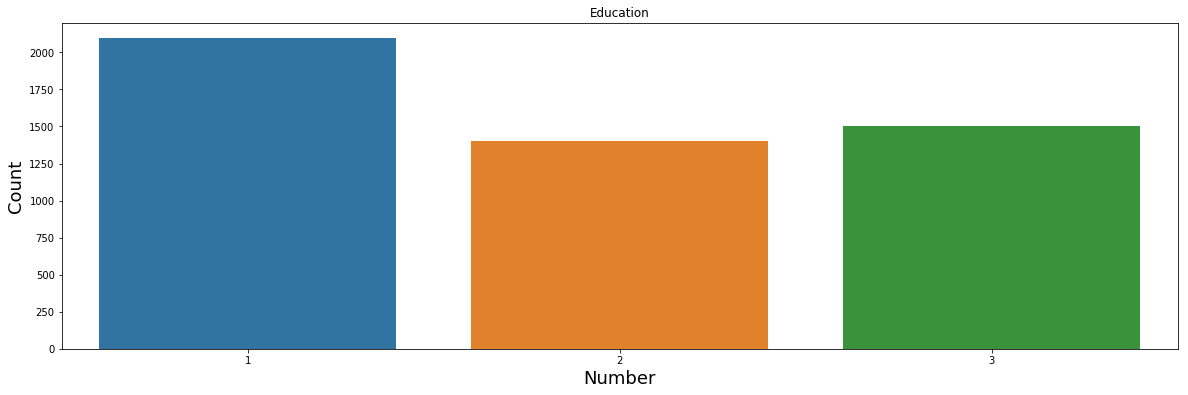

In [25]:
count_sec = data['Education'].value_counts()
sns.barplot(x=count_sec.index,y=count_sec)
plt.title('Education')
plt.xlabel('Number',fontsize=18)
plt.ylabel('Count',fontsize=18)

Text(0, 0.5, 'Count')

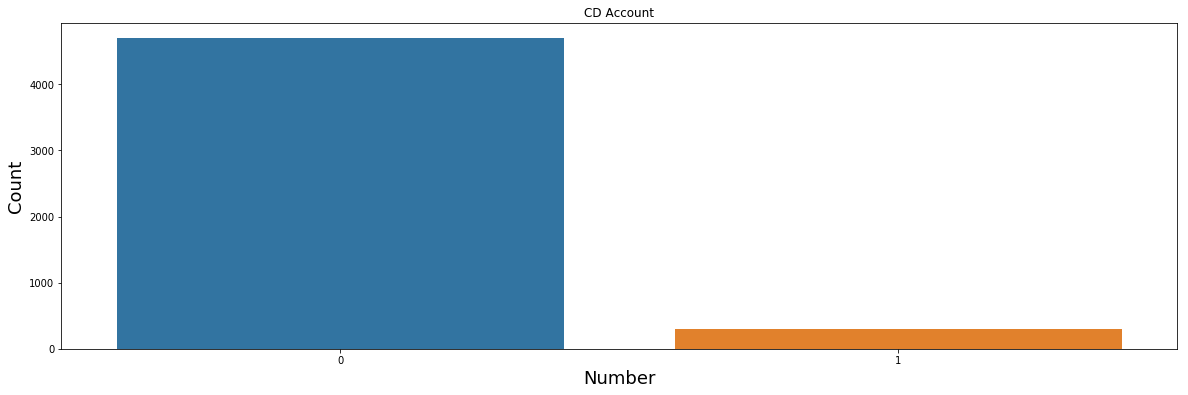

In [26]:
count_CD = data['CD Account'].value_counts()
sns.barplot(x=count_CD.index,y=count_CD)
plt.title('CD Account')
plt.xlabel('Number',fontsize=18)
plt.ylabel('Count',fontsize=18)

Text(0, 0.5, 'Count')

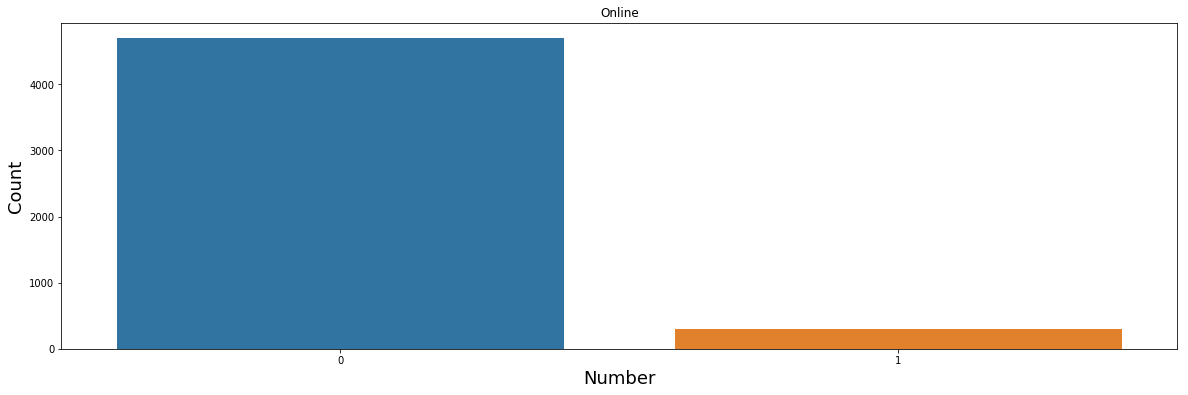

In [27]:
count_Online = data['Online'].value_counts()
sns.barplot(x=count_CD.index,y=count_CD)
plt.title('Online')
plt.xlabel('Number',fontsize=18)
plt.ylabel('Count',fontsize=18)

Text(0, 0.5, 'Count')

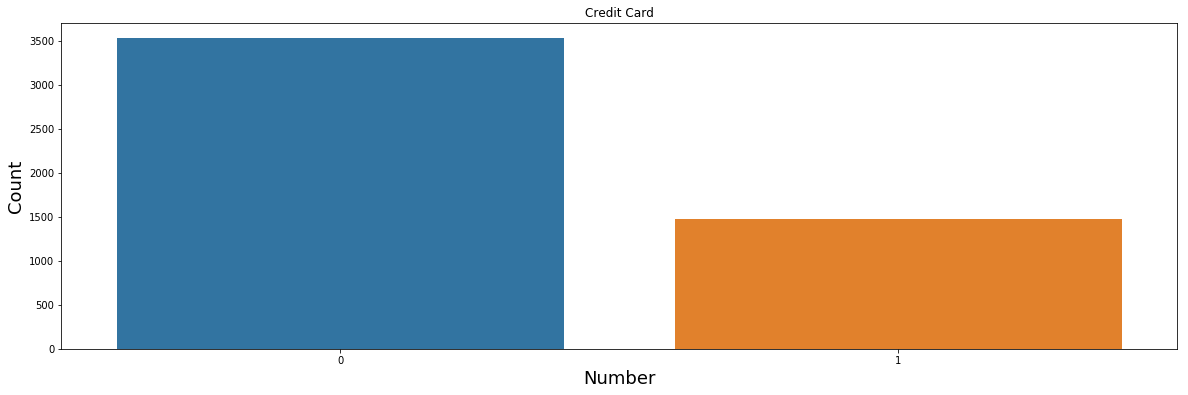

In [28]:
count_CC = data['CreditCard'].value_counts()
sns.barplot(x=count_CC.index,y=count_CC)
plt.title('Credit Card')
plt.xlabel('Number',fontsize=18)
plt.ylabel('Count',fontsize=18)

In [34]:
#We shall now check for outliers

In [35]:
#Outliers
#Values beyond 3 standard deviation is considered outliers in this example
exp_mean, exp_std = np.mean(data['Experience']), np.std(data['Experience'])
age_mean, age_std = np.mean(data['Age']), np.std(data['Age'])
Income_mean, Income_std = np.mean(data['Income']), np.std(data['Income'])
CC_mean, CC_std = np.mean(data['CCAvg']), np.std(data['CCAvg'])
mort_mean, mort_std = np.mean(data['Mortgage']), np.std(data['Mortgage'])

cut_off_age = age_std * 3
cut_off_exp = exp_std * 3
cut_off_income = Income_std * 3
cut_off_CC = CC_std * 3
cut_off_mort = mort_std * 3

lower_exp, upper_exp = exp_mean - cut_off_exp, exp_mean + cut_off_exp
lower_age, upper_age = age_mean - cut_off_age, age_mean + cut_off_age
lower_income, upper_income = Income_mean - cut_off_income, Income_mean + cut_off_income
lower_CC, upper_CC = CC_mean - cut_off_CC, CC_mean + cut_off_CC
lower_mort, upper_mort = mort_mean - cut_off_mort, mort_mean + cut_off_mort

In [36]:
outliers_exp = [x for x in data['Experience'] if x < lower_exp or x > upper_exp]
outliers_age = [x for x in data['Age'] if x < lower_age or x > upper_age]
outliers_income = [x for x in data['Income'] if x < lower_income or x > upper_income]
outliers_CC = [x for x in data['CCAvg'] if x < lower_CC or x > upper_CC]
outliers_mort = [x for x in data['Mortgage'] if x < lower_mort or x > upper_mort]

In [37]:
print("The number of outliers in Experience are:",len(outliers_exp))
print("The number of outliers in Age are:",len(outliers_age))
print("The number of outliers in Income are:",len(outliers_income))
print("The number of outliers in Credit Card Avg are:",len(outliers_CC))
print("The number of outliers in Mortgages:",len(outliers_mort))

The number of outliers in Experience are: 0
The number of outliers in Age are: 0
The number of outliers in Income are: 2
The number of outliers in Credit Card Avg are: 121
The number of outliers in Mortgages: 105


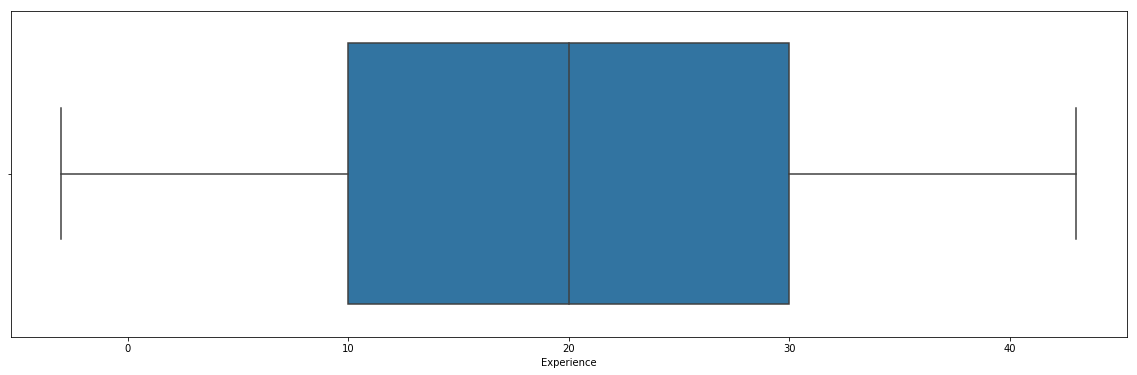

In [38]:
#outliers:BOX PLOT - Experience
sns.boxplot(x='Experience',data=data)
plt.show()

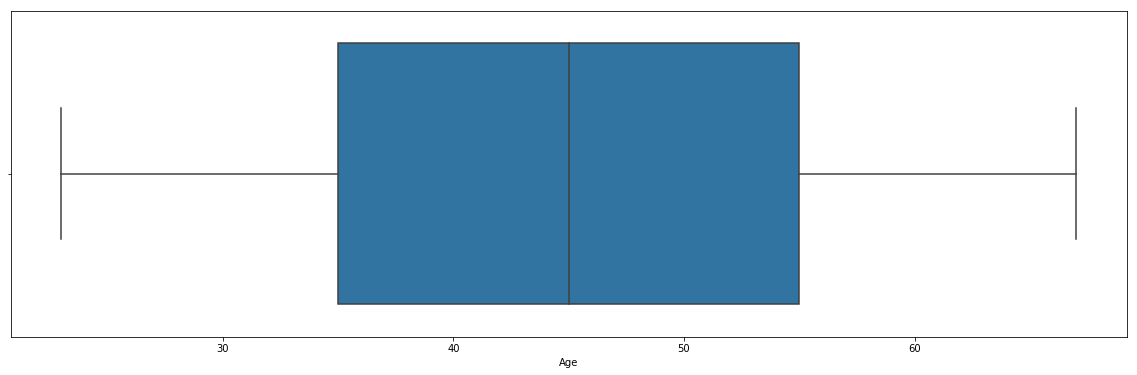

In [39]:
#outliers:BOX PLOT - Age
sns.boxplot(x='Age',data=data)
plt.show()

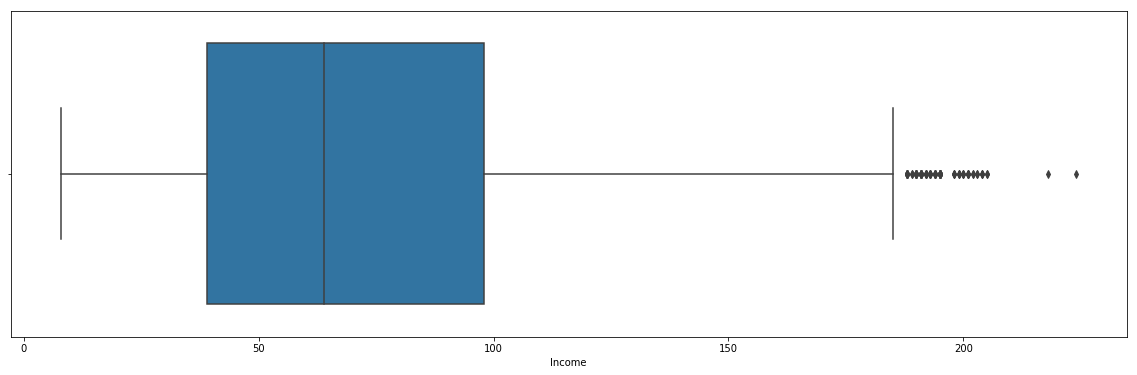

In [40]:
#outliers:BOX PLOT - Income
sns.boxplot(x='Income',data=data)
plt.show()

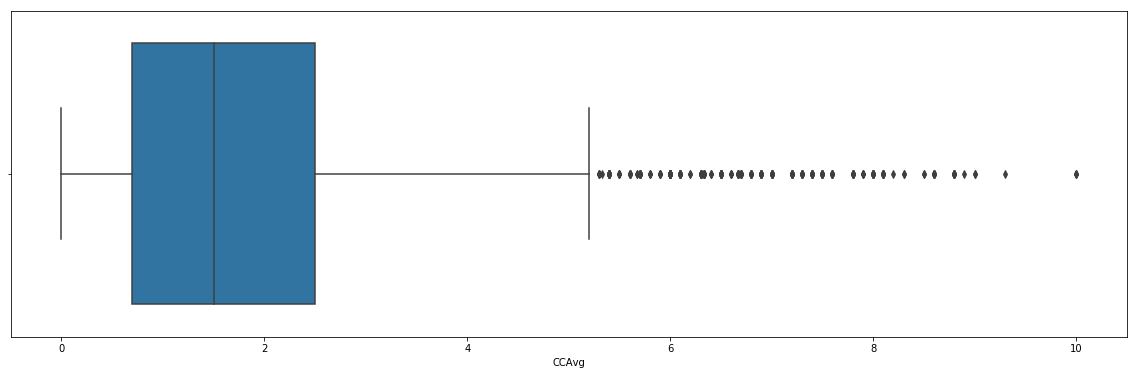

In [41]:
#outliers:BOX PLOT - CC Avg
sns.boxplot(x='CCAvg',data=data)
plt.show()

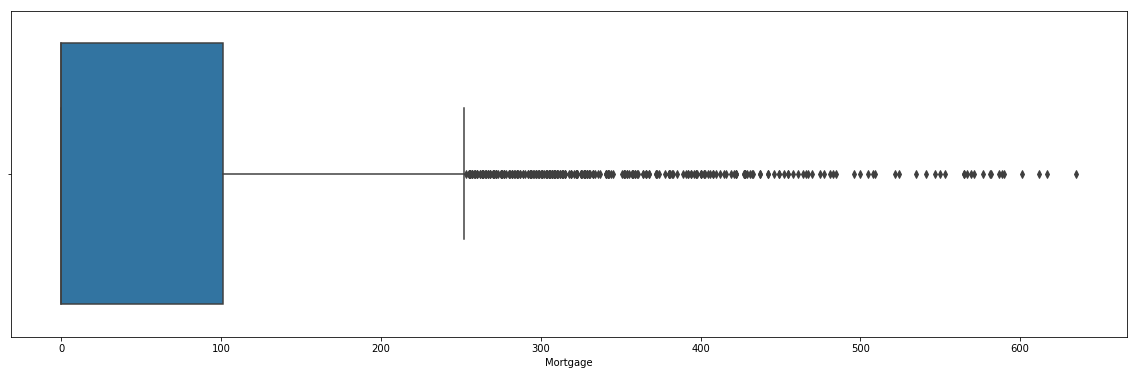

In [42]:
#outliers:BOX PLOT - Mortgage
sns.boxplot(x='Mortgage',data=data)
plt.show()

In [43]:
#We can Observe a lot of outliers in Mortgage and CC Avg

Text(0, 0.5, 'Count')

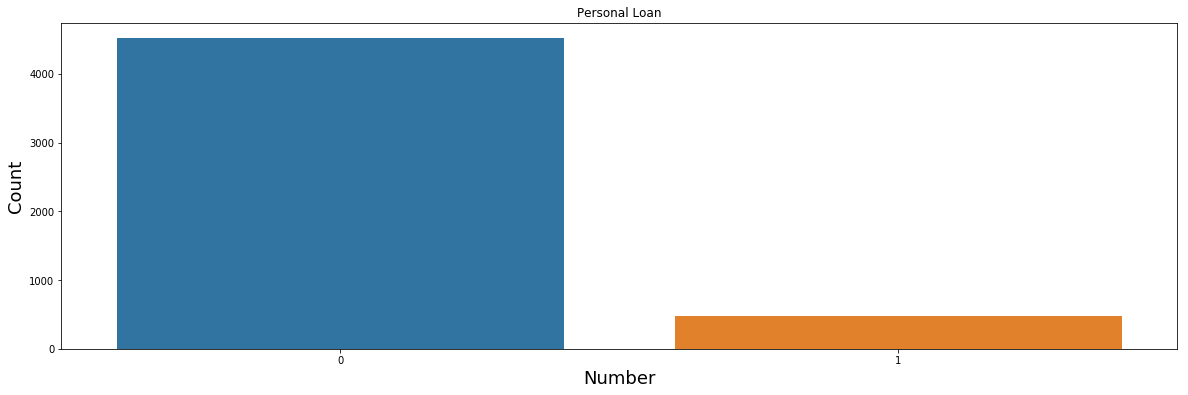

In [44]:
#Looking at this Plot we can observe that our target column is Highly imbalanced
#We might need to employ some sampling techniques to counter the class imbalace
count_PL = data['Personal Loan'].value_counts()
sns.barplot(x=count_PL.index,y=count_PL)
plt.title('Personal Loan')
plt.xlabel('Number',fontsize=18)
plt.ylabel('Count',fontsize=18)

In [45]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [57]:
accepted.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard', 'Education_1', 'Education_2', 'Education_3'],
      dtype='object')

In [46]:
cont_columns = ['Age', 'Experience', 'Income', 'CCAvg',
       'Education', 'Mortgage']

In [56]:
accepted = pd.get_dummies(accepted, columns=['Education'], prefix='Education')
rejected = pd.get_dummies(rejected, columns=['Education'], prefix='Education')

In [58]:
count_columns = ['Family',
       'Securities Account', 'CD Account',
       'Online', 'CreditCard', 'Education_1', 'Education_2', 'Education_3']

In [59]:
p_val_cont = []
t_stat_cont = []
parameter_cont = []

In [63]:
for i in cont_columns:
    try:
        d = accepted.dropna(subset=[i])
        d_1 = rejected.dropna(subset=[i])
        t_stat, p_val = ttest_ind(d[i],d_1[i], equal_var = False)
        p_val_cont.append(p_val)
        t_stat_cont.append(t_stat)
        parameter_cont.append(i)
    except:
        continue
    

In [69]:
for i in zip(p_val_cont,parameter_cont):
    print(i)

(0.5888296962819966, 'Age')
(0.6036157248055006, 'Experience')
(1.3307350724604335e-227, 'Income')
(2.1541864934317262e-77, 'CCAvg')
(1.2480046280686968e-10, 'Mortgage')


In [76]:
#Looking at the p-values for the t-test, we can conclude that at 95% confidence, Income, CCAvg and Mortgage are significantly different between the two classes

In [71]:
p_val_cat = []
t_stat_cat = []
parameter_cat = []

In [73]:
for i in count_columns:
    try:
        d = accepted.dropna(subset=[i])
        d_1 = rejected.dropna(subset=[i])
        
        #d = d[d[i]==1]
        #d_1 = d_1[d_1[i]==1]
        t_stat, p_val = proportions_ztest([len(d[d[i]==1]),len(d_1[d_1[i]==1])],[len(d),len(d_1)])
        p_val_cat.append(p_val)
        t_stat_cat.append(t_stat)
        parameter_cat.append(i)
    except:
        continue
    

In [74]:
for i in zip(p_val_cat,parameter_cat):
    print(i)

(0.0003014619855267572, 'Family')
(0.12057278505742433, 'Securities Account')
(7.771898331676196e-111, 'CD Account')
(0.6571086782806873, 'Online')
(0.842969492799571, 'CreditCard')
(6.390618527606401e-26, 'Education_1')
(4.2996407569881974e-07, 'Education_2')
(1.7831526625872706e-10, 'Education_3')


In [75]:
#Looking at the p-values for the proportion z-test, we can conclude that at 95% confidence, CD Acount and Education are significantly different between the two classes

In [78]:
#We will fix the negative values in Experience

In [79]:
accepted.Experience.min()

0

In [80]:
rejected.Experience.min()

-3

In [82]:
len(rejected[rejected['Experience']<0])

52

In [83]:
#There are 52 rows in the Rejected class(majority class) that has negative values for Experience, so we shall reject these rows

In [84]:
rejected = rejected[rejected['Experience']>=0]

In [86]:
#We shall now split the data into a 70:30 split of train and test

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
cols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg',
       'Mortgage', 'Securities Account', 'CD Account',
       'Online', 'CreditCard', 'Education_1', 'Education_2', 'Education_3']

In [90]:
data = pd.get_dummies(data, columns=['Education'], prefix='Education')

In [91]:
X = data[cols]
y = data['Personal Loan']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [93]:
#Logistic Regression without over or under sampling

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score, roc_curve

In [98]:
log = LogisticRegression()

In [99]:
log.fit(X_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [100]:
log_pred = log.predict(X_test)
log_pred_prob = log.predict_proba(X_test)

In [101]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1343
           1       0.89      0.69      0.78       157

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.93      0.84      0.88      1500
weighted avg       0.96      0.96      0.96      1500



In [102]:
#Confusion Matrix - Logistic Regression
print(confusion_matrix(y_test,log_pred))

[[1330   13]
 [  49  108]]


In [105]:
print(roc_auc_score(y_test,log_pred_prob[:,1]))

0.9716956523801168


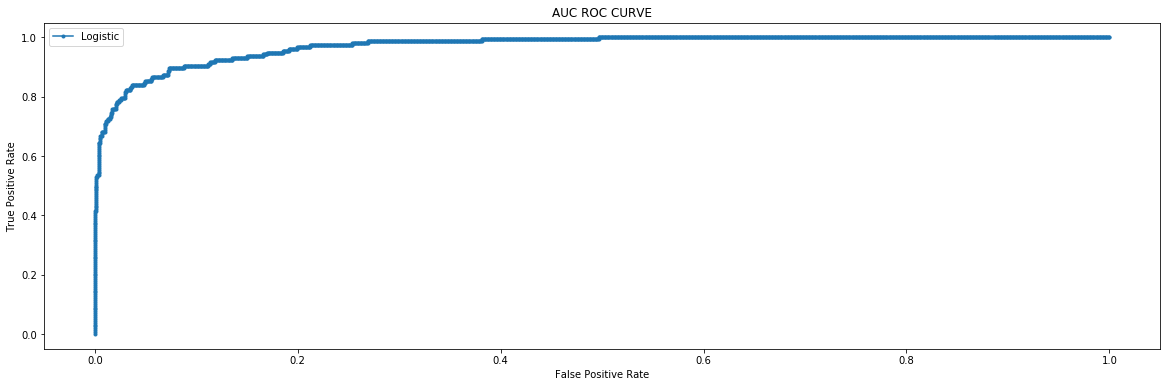

In [118]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
lr_fpr_log, lr_tpr_log, _ = roc_curve(y_test,log_pred_prob[:,1],drop_intermediate=False)

plt.title('AUC ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(lr_fpr_log, lr_tpr_log, marker='.', label='Logistic')
plt.legend(loc=0)

In [111]:
from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB()

NB_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [112]:
NB_pred = NB_model.predict(X_test)
NB_pred_proba = NB_model.predict_proba(X_test)

In [113]:
print(classification_report(y_test,NB_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1343
           1       0.51      0.60      0.55       157

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.73      0.77      0.75      1500
weighted avg       0.91      0.90      0.90      1500



In [114]:
#Confusion Matrix - NB Classifier
print(confusion_matrix(y_test,NB_pred))

[[1252   91]
 [  63   94]]


In [115]:
print(roc_auc_score(y_test,NB_pred_proba[:,1]))

0.9426988726636345


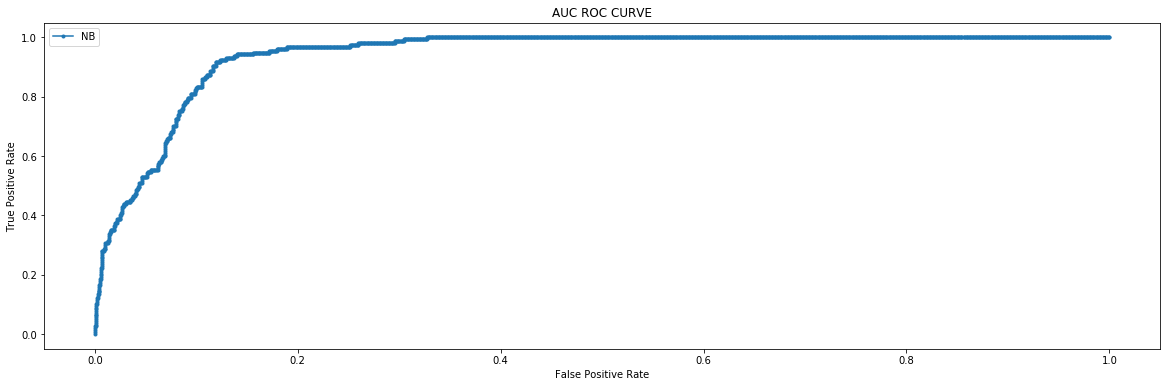

In [119]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
lr_fpr_NB, lr_tpr_NB, _ = roc_curve(y_test,NB_pred_proba[:,1],drop_intermediate=False)

plt.title('AUC ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(lr_fpr_NB, lr_tpr_NB, marker='.', label='NB')
plt.legend(loc=0)

In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [166]:
NNH = KNeighborsClassifier(n_neighbors= 13 , weights = 'distance' )

In [167]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='distance')

In [168]:
NNH_pred = NNH.predict(X_test)
NNH_pred_proba = NNH.predict_proba(X_test)

In [169]:
print(classification_report(y_test,NNH_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1343
           1       0.64      0.30      0.41       157

   micro avg       0.91      0.91      0.91      1500
   macro avg       0.78      0.64      0.68      1500
weighted avg       0.89      0.91      0.89      1500



In [170]:
#Confusion Matrix - KNN classifier
print(confusion_matrix(y_test,NNH_pred))

[[1316   27]
 [ 110   47]]


In [171]:
print(roc_auc_score(y_test,NNH_pred_proba[:,1]))

0.9046530488354335


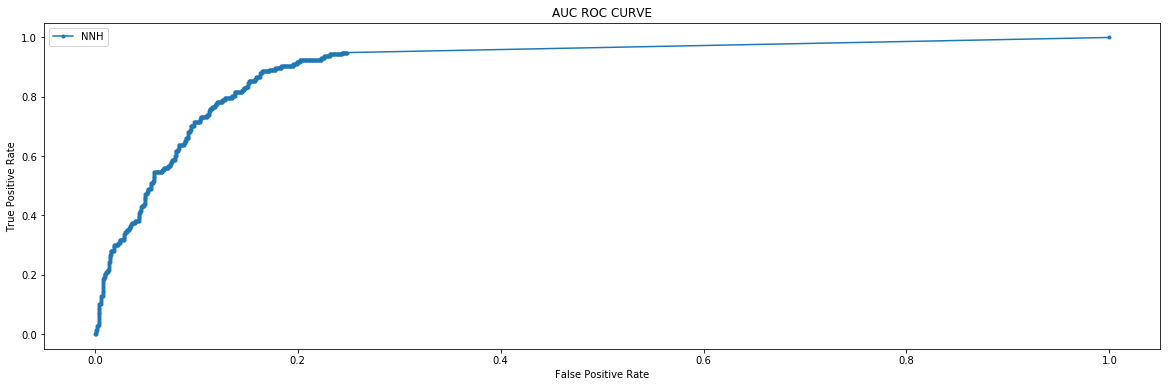

In [172]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
lr_fpr_NNH, lr_tpr_NNH, _ = roc_curve(y_test,NNH_pred_proba[:,1],drop_intermediate=False)

plt.title('AUC ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(lr_fpr_NNH, lr_tpr_NNH, marker='.', label='NNH')
plt.legend(loc=0)

In [173]:
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))

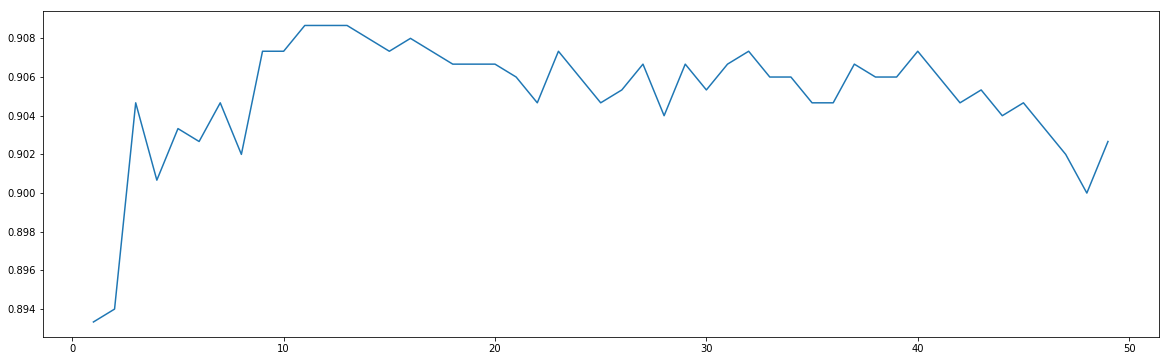

In [174]:
#Looking at the Graph we can observe that 12, 13 and 14 gives a high score
#Amongst 12, 13 and 14, 13 gives the highest AUC-ROC score, hence we select 13
plt.plot(range(1,50),scores)

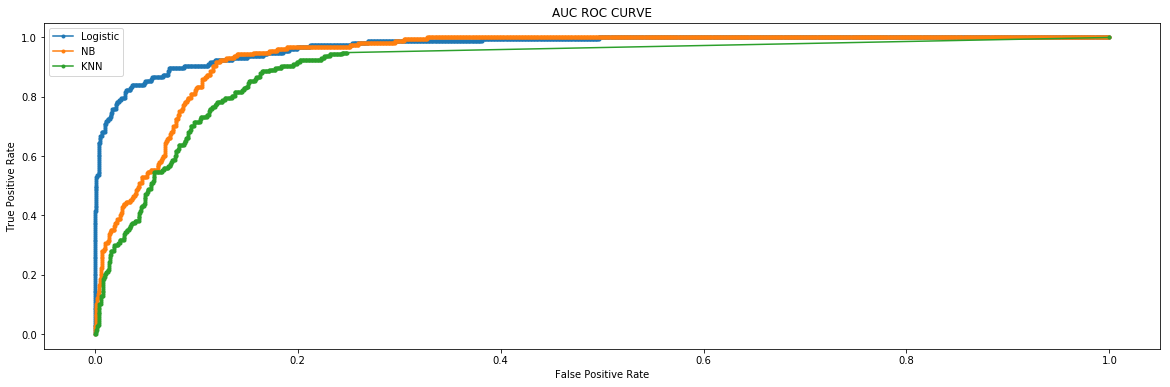

In [178]:
plt.title('AUC ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(lr_fpr_log, lr_tpr_log, marker='.', label='Logistic')
plt.plot(lr_fpr_NB, lr_tpr_NB, marker='.', label='NB')
plt.plot(lr_fpr_NNH, lr_tpr_NNH, marker='.', label='KNN')
plt.legend(loc=0)

In [179]:
#Looking at the AUC ROC cureves and scores we select the Logistic Regression for the classification task as it gives the highest AUC-ROC score

In [180]:
#Logistic regression worked well in this case, most probably because, a hyperplane was able to separate the two classes accurately